<a href="https://colab.research.google.com/github/haley3y/EDA/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting a EDA project using amazon book dataset
URL: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019



Link to the medium blogpost: https://hailinyu.medium.com/eda-amazon-top-50-bestselling-books-2009-2019-2bdcc2eaa544

In [5]:
# importing library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px



In [27]:
# load dataset
book = pd.read_csv('bestsellers with categories.csv')

# take a look at the dataset
book.head()

# sort book order by price
book2 = book.sort_values(by = "Price")
book2

# remove the data entry that have a book price at 0
rm_price = book2[book2.Price != 0]
rm_price.sort_values(by = "Price")
rm_price

# rm_price.describe()

book3 = book.sort_values(by = "Price", ascending=False)
book3 

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
...,...,...,...,...,...,...,...
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [ ]:
# Is there more fiction or non-fiction in the top-selling books list?

label_gen = ["Fiction","Non-fiction"]

fig = px.pie(book, names='Genre',title='User',hover_data=['Genre'])
fig.show()

lmplot(data=rm_price, x="Price", y="Reviews")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Mean price: 13.1


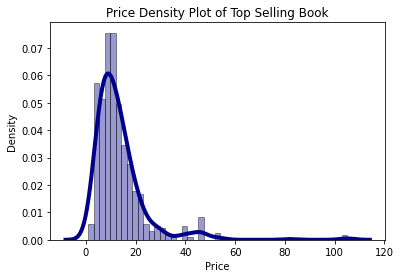

In [31]:
# Question 2: Do top-selling books have high user ratings?

ax2 = sb.distplot(rm_price["Price"], hist = True, kde=True,
            color = "darkblue", hist_kws={'edgecolor':'black'}, 
            kde_kws={'linewidth': 4})

ax2.set_title("Price Density Plot of Top Selling Book")

print("Mean price:",round(np.mean(book["Price"]),2))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Mean user rating: 4.62


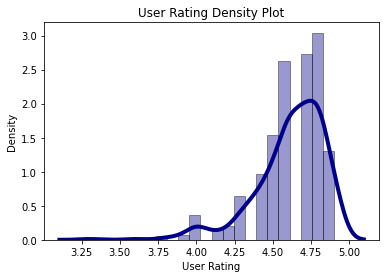

In [30]:
# reference for density plot: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# Question 3: What is the average price of the best-selling books?

# What is the ave

# Density Plot of User Rating (x)
ax1 = sb.distplot(book["User Rating"], hist = True, kde=True,
            color = "darkblue", hist_kws={'edgecolor':'black'}, 
            kde_kws={'linewidth': 4})

ax1.set_title("User Rating Density Plot")

print("Mean user rating:",round(np.mean(book["User Rating"]),2))


Text(0.5, 0.98, 'Relationship between price and user review counts')

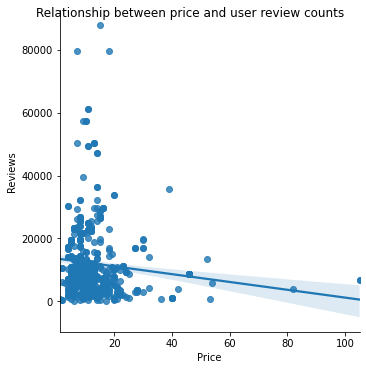

In [28]:
# Question 4: What is the relationship between price and user ratings?

r1 = sb.lmplot(data=rm_price, x="Price", y="Reviews")
r1.fig.suptitle('Relationship between price and user review counts')


# rm_price["log_price"] = np.log(rm_price.Price)
# print(rm_price)                              
                               
# r2 = sb.lmplot(data=rm_price, x="log_price", y="User Rating")
# r2.fig.suptitle('Relationship between price and user ratings')



Text(0.5, 0.98, 'Relationship between price and reviews count')

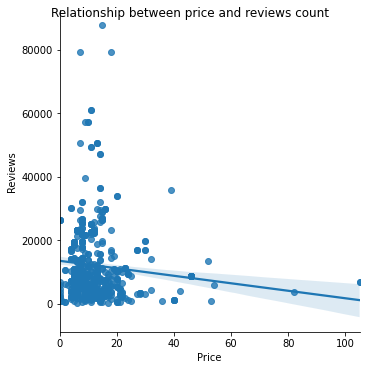

In [30]:
# Question 5: What is the relationship between price and reviews count?

# book["log_reviews"] = np.log(book.Reviews)
# print(book)                              
                      

r3 = sb.lmplot(data=book, x="Price", y="Reviews")
r3.fig.suptitle('Relationship between price and reviews count')



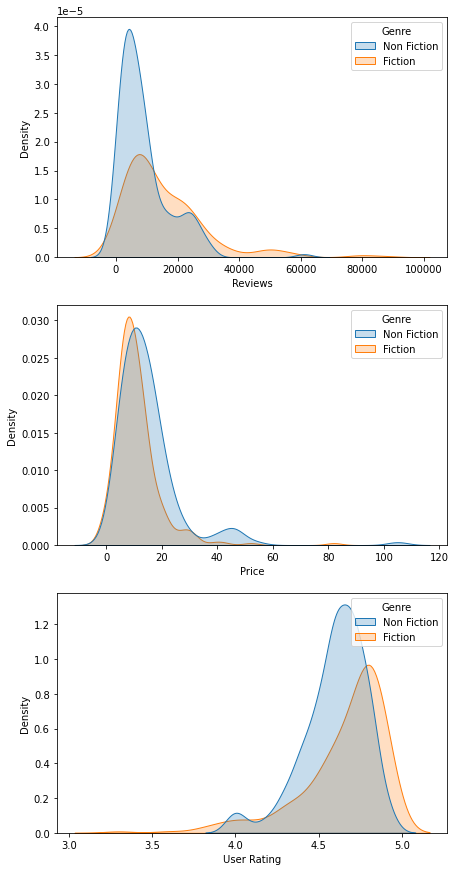

In [26]:

# Question 6: Consumer behavior of fictional and non-fictional readers

f, axes = plt.subplots(3, 1, figsize=(7, 15))

p1 = sb.kdeplot(data=book, x='User Rating', hue='Genre', shade = True, ax=axes[2])

p2 = sb.kdeplot(data=book, x='Price', hue='Genre', shade = True, ax=axes[1])

p3 = sb.kdeplot(data=book, x='Reviews', hue='Genre', shade = True, ax=axes[0])



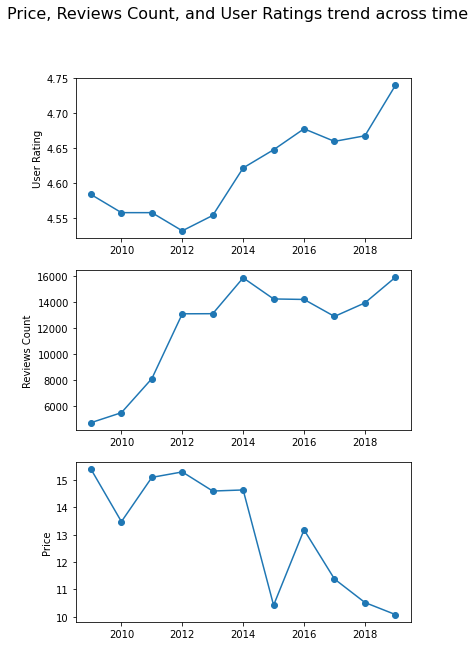

In [32]:
Question 7: How does the price, reviews count, and rating change with time?
# print(book.groupby("Year").mean())

# group by year then calculate yearly average
trend = book.groupby("Year").mean()

# reset dataframe as a seperate column
trend.reset_index(level=0, inplace=True)

# Look at the trend in price, reviews count, and user ratings across time

# Type solution here
f, (sub1, sub2, sub3) = plt.subplots(3, 1, figsize = (6,10))

sub1.plot(trend["Year"], trend["User Rating"], label = "User Rating", marker='o')
sub1.set_ylabel('User Rating')

sub2.plot(trend["Year"], trend["Reviews"], label = "Reviews", marker='o')
sub2.set_ylabel('Reviews Count')

sub3.plot(trend["Year"], trend["Price"], label = "Price", marker='o')
sub3.set_ylabel('Price')

plt.suptitle('Price, Reviews Count, and User Ratings trend across time', fontsize=16)

# plt.suptitle('Avocado Prices and Volume Time Series', fontsize=12)
plt.show()




